# Installation and Python Version Instructions:

In this Python Script we will be working with python version 3.10.0

Please choose the correct kernel indicated by the red arrow:
<img src="images\kernel1.png" alt="Getting started" />


If you do not have this option, please download the correct version of pyhton and instaal it for all users.
Here is the link to the python version 3.10.0
https://www.python.org/downloads/release/python-3100/ 

In [114]:
# from google.colab import drive
# drive.mount('/content/drive')

## Step 1: Prepare Your Data

Python version 3.10.0

In [115]:
# face_recognizer/
# ├── output/
# |
# ├── training/
# │   └── nicolas_cage/
# │       ├─ class0
# │       └─ class1
# |
# ├── validation/
# │   └── nicolas_cage/
# │       ├── class0
# │       └── class1
# |
# ├── detector
# └── unknown.jpg

In [116]:
# %pip install keras tensorflow Pillow scikit-learn

In [117]:
# %pip install tensorflow


In [118]:
# %pip install Pillow

In [119]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam
import math
from sklearn import neighbors
import os
import os.path
import pickle
from PIL import Image, ImageDraw

In [120]:
# building our model
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dropout(0.5))

# output layer
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

In [121]:
# Compiling our model:
classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.compile(optimizer=Adam(lr=0.0005), loss="mae")

## Step 2: Load Training Data and Train Your Model

In [122]:
os.listdir("training")

['class0', 'class1', 'class1.zip']

In [123]:
# Image augmentations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [124]:
training_set = train_datagen.flow_from_directory('training',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = "binary")

print(training_set.class_indices)

Found 267 images belonging to 2 classes.


{'class0': 0, 'class1': 1}


In [125]:
test_set = test_datagen.flow_from_directory('validation',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            shuffle = True,
                                            class_mode = "binary")
print(test_set.class_indices)

Found 124 images belonging to 2 classes.


{'class0': 0, 'class1': 1}


In [126]:
# training our network
history = classifier.fit(training_set,
                         steps_per_epoch = 10,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 100)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.7141 - loss: 0.6390 - val_accuracy: 0.4919 - val_loss: 0.8058
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.7310 - loss: 0.6231 - val_accuracy: 0.4919 - val_loss: 0.9800
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - accuracy: 0.7526 - loss: 0.5959 - val_accuracy: 0.4919 - val_loss: 0.8308
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.7423 - loss: 0.5882 - val_accuracy: 0.4919 - val_loss: 0.7717
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.7761 - loss: 0.5176 - val_accuracy: 0.4919 - val_loss: 0.6749
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.7459 - loss: 0.5308 - val_accuracy: 0.4919 - val_loss: 0.7603
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.7720 - loss: 0.5012 - val_accuracy: 0.5242 - val_loss: 0.6413
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.7754 - loss: 0.4957 - val_accuracy: 0.

In [127]:
from keras.callbacks import LearningRateScheduler, EarlyStopping

def lr_schedule(epoch):
    lr = 0.01 * (0.9 ** epoch)
    print(f"Learning rate: {lr:.10f}")
    return lr

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = classifier.fit(training_set,
                         steps_per_epoch = 10,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 100,
                         callbacks=[LearningRateScheduler(lr_schedule), early_stopping])

Learning rate: 0.0100000000
Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - accuracy: 0.8889 - loss: 0.3018 - val_accuracy: 0.8629 - val_loss: 0.4412 - learning_rate: 0.0100
Learning rate: 0.0090000000
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.9179 - loss: 0.3121 - val_accuracy: 0.8952 - val_loss: 0.3930 - learning_rate: 0.0090
Learning rate: 0.0081000000
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.8942 - loss: 0.2969 - val_accuracy: 0.9032 - val_loss: 0.3795 - learning_rate: 0.0081
Learning rate: 0.0072900000
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.8778 - loss: 0.2929 - val_accuracy: 0.8952 - val_loss: 0.3736 - learning_rate: 0.0073
Learning rate: 0.0065610000
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - accuracy: 0.8935 - loss: 0.2853 - val_accuracy: 0.8790 - val_loss: 0.3892 - learning_rate: 0.0066
Learning rate: 0.0059049000
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.9170 -

In [128]:
##########################
# SAVE-LOAD using pickle #
##########################
import pickle

# save
with open('knn_face_detection_model_classifier.pkl','wb') as f:
    pickle.dump(history,f)

# # load
# with open('/content/drive/MyDrive/PDAN8411 ICE 1/model_classifier.pkl', 'rb') as f:
#     clf2 = pickle.load(f)


## 3. Test the model.

In [129]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [130]:
# %pip install matplotlib

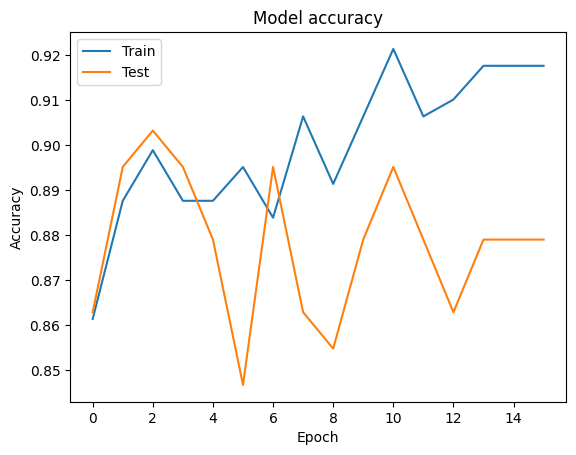

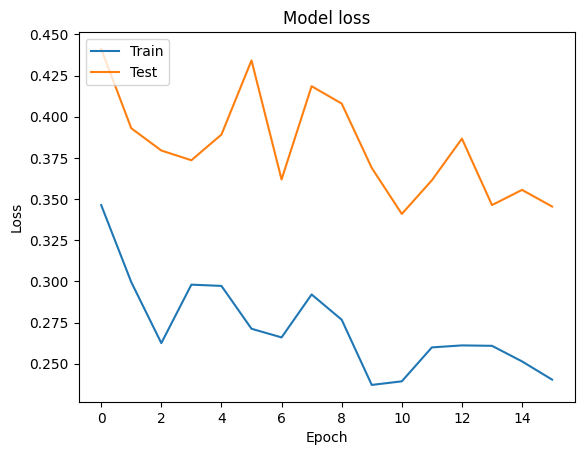

In [131]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [132]:
# MAKING PREDICTIONS:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image
import os
import cv2 

In [133]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [134]:
# Load and process the test image
test_image = cv2.imread("nick.webp")
# test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)


In [135]:
faces_rects = haar_cascade_face.detectMultiScale(test_image, scaleFactor = 1.2, minNeighbors = 5)

In [136]:
faces_rects

array([[148, 173,  84,  84],
       [287,  32, 133, 133]])

In [137]:
face_data = []
for face in faces_rects:
  face_data.append(face)

print(face_data)

[array([148, 173,  84,  84]), array([287,  32, 133, 133])]


In [138]:
print('Faces found: ', len(faces_rects))

Faces found:  2


In [139]:
for (x,y,w,h) in faces_rects:
  face_with_box = cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)


In [140]:
cv2.imwrite("face_with_box_nick.jpg", face_with_box)

True

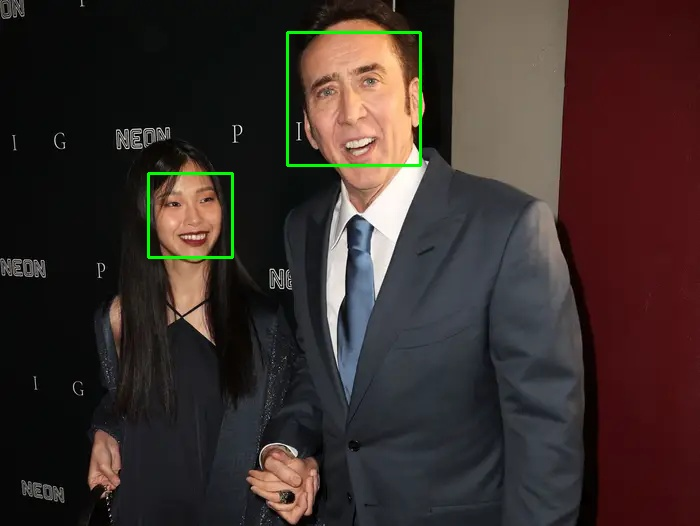

In [141]:
face_with_box = "face_with_box_nick.jpg"
img = Image(face_with_box, width = "400", height = "400")
display(img)
print("\n")
print("\n")

149 173 82 82
283 32 132 132


(-0.5, 699.5, 525.5, -0.5)

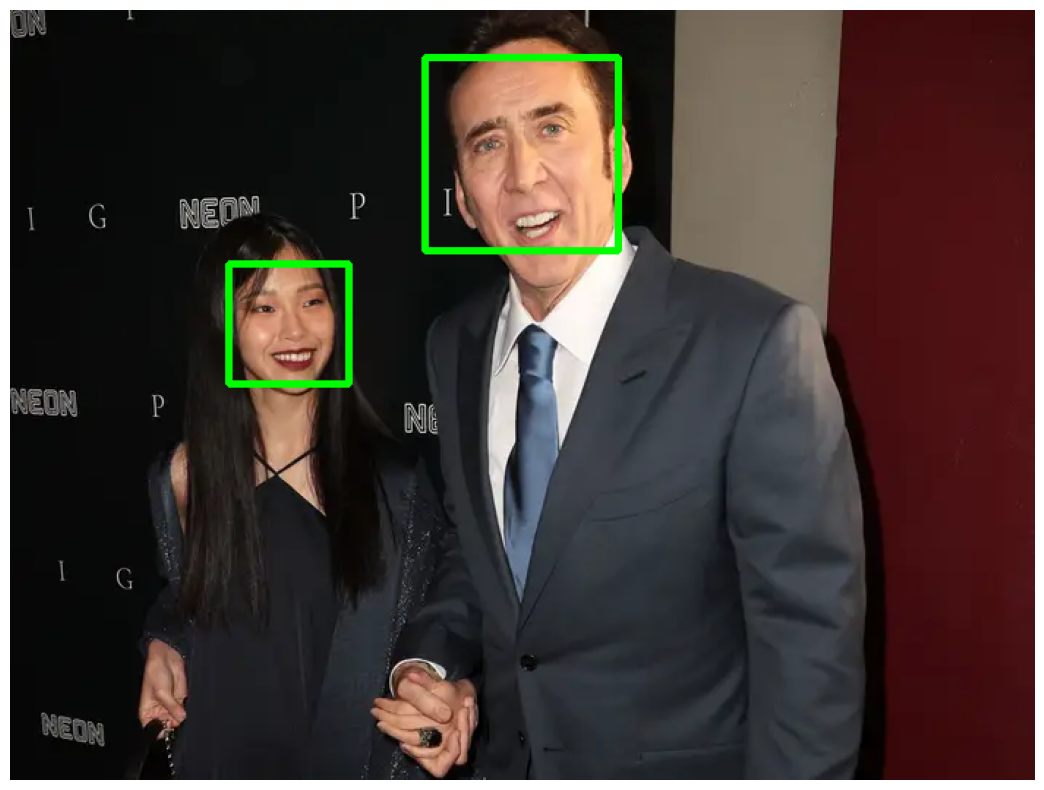

In [170]:
# Load and process the test image
imagePath = 'nick.webp'
img = cv2.imread(imagePath)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

face = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    print(x, y, w, h)
    
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

cv2.imwrite(f"face_with_box_{imagePath}", img_rgb)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [173]:
# If you want to crop the logo out using OpenCV's cropping tool
imagePath = 'nick.webp'
img = cv2.imread(imagePath)

i = 1
for (x, y, w, h) in face:
    crop_img = img[y:y+h, x:x+w]
    img_rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f"face_{i} {imagePath}", img_rgb)
    print(f"face_{i} {imagePath}")
    i += 1


face_1 nick.webp
face_2 nick.webp


(-0.5, 81.5, 81.5, -0.5)

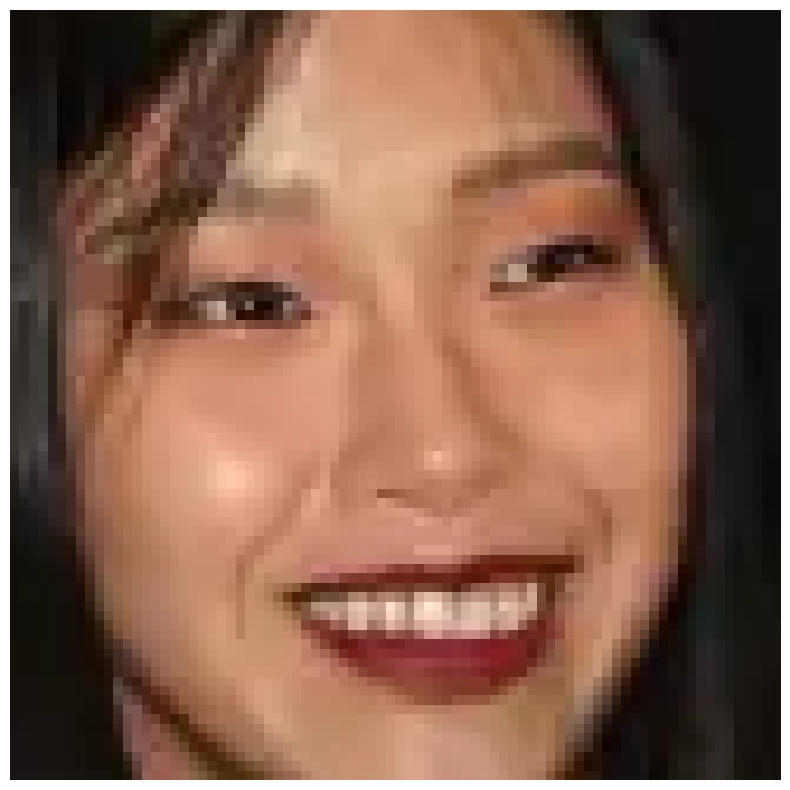

In [174]:
img = cv2.imread("face_1 nick.webp")
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')

(-0.5, 131.5, 131.5, -0.5)

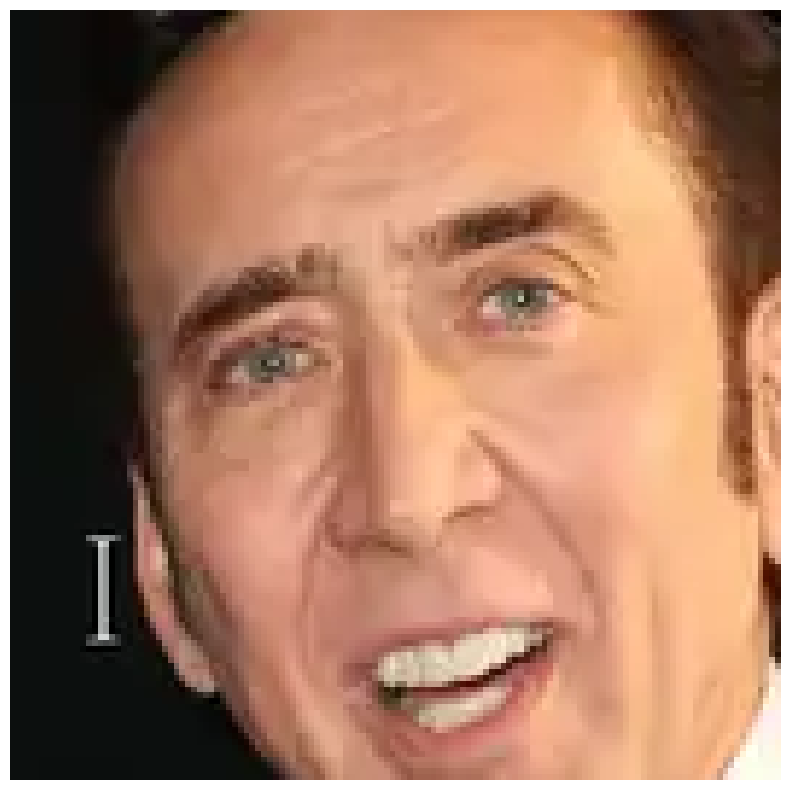

In [175]:
img = cv2.imread("face_2 nick.webp")
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This is not Nicolas Cage:


(-0.5, 131.5, 131.5, -0.5)

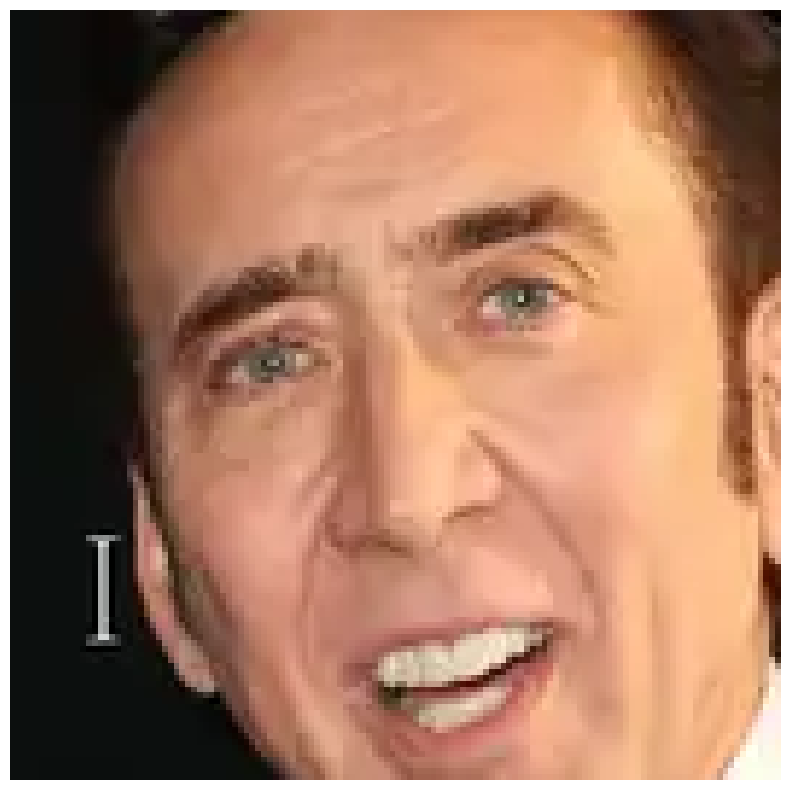

In [176]:
file = "face_2 nick.webp"
test_image = image.load_img(file, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'This is Nicolas Cage:'
else:
    prediction = 'This is not Nicolas Cage:'

print(prediction)

plt.figure(figsize=(20,10))
plt.imshow(cv2.imread(file))
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This is not Nicolas Cage:


(-0.5, 131.5, 131.5, -0.5)

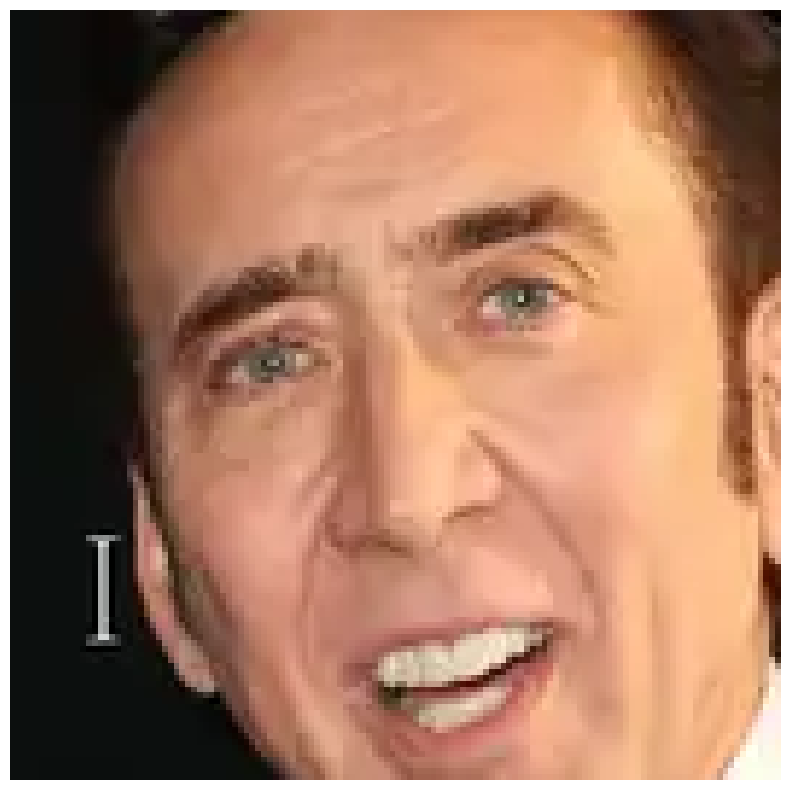

In [177]:
# Load and process the test image
imagePath = 'unknown.png'

test_image = image.load_img(file, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'This is Nicolas Cage:'
else:
    prediction = 'This is not Nicolas Cage:'

print(prediction)

img = cv2.imread(imagePath)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

face = face_classifier.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    print(x, y, w, h)
    
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

cv2.imwrite(f"face_with_box_{imagePath}", img)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This is Nicolas Cage:


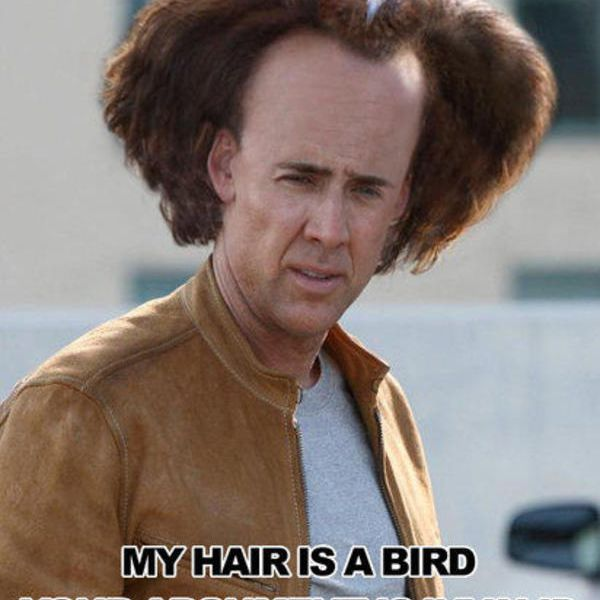





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This is not Nicolas Cage:


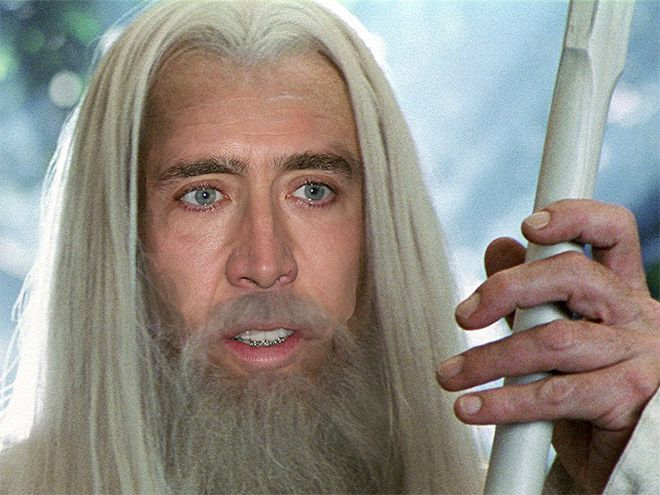





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This is not Nicolas Cage:


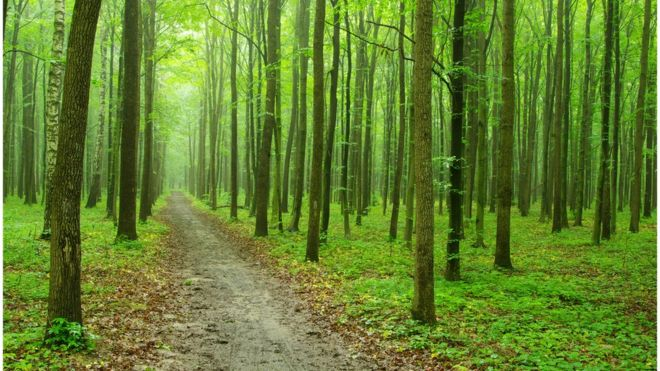





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This is Nicolas Cage:


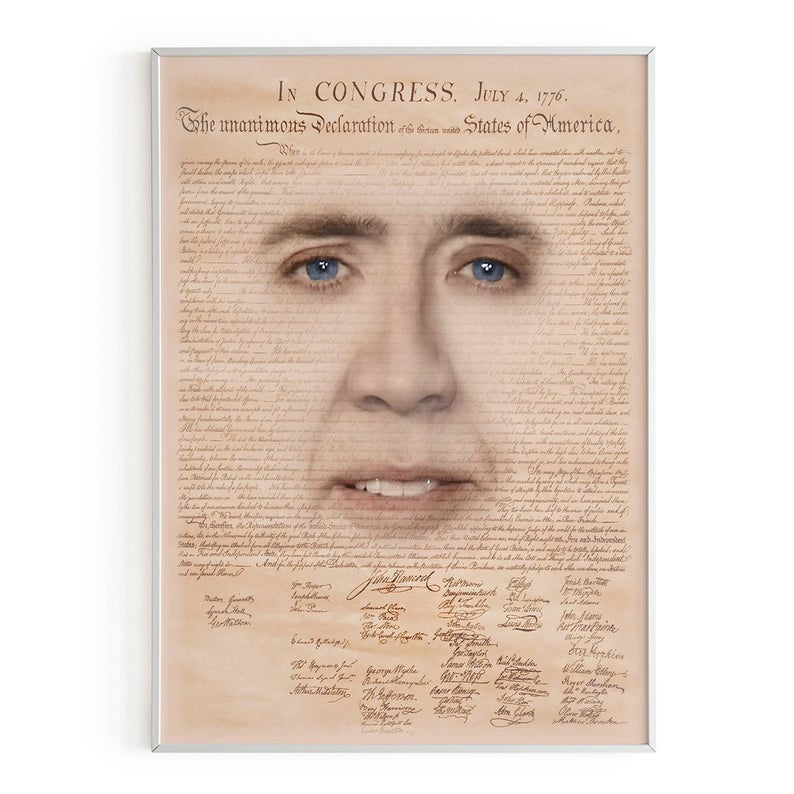





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This is Nicolas Cage:


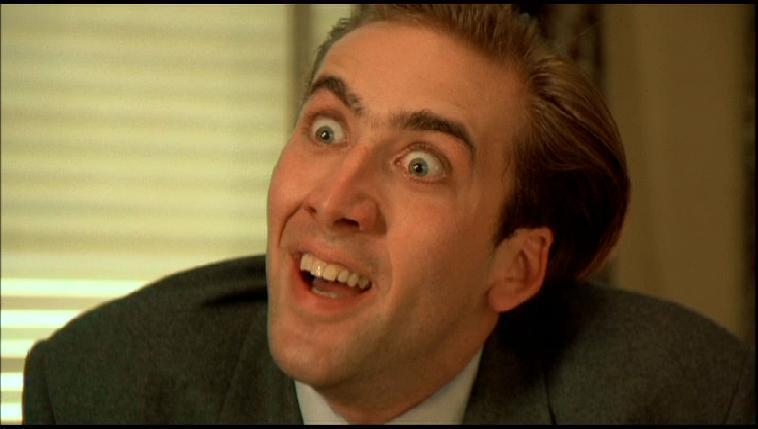





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
This is Nicolas Cage:


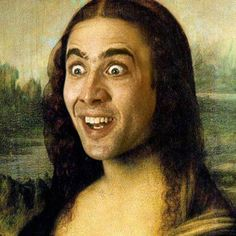





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This is Nicolas Cage:


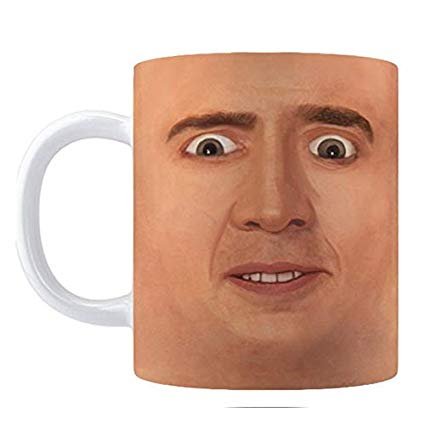





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This is Nicolas Cage:


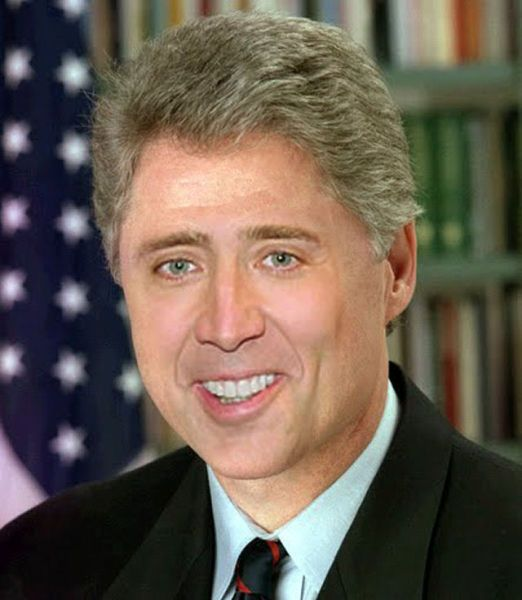





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This is Nicolas Cage:


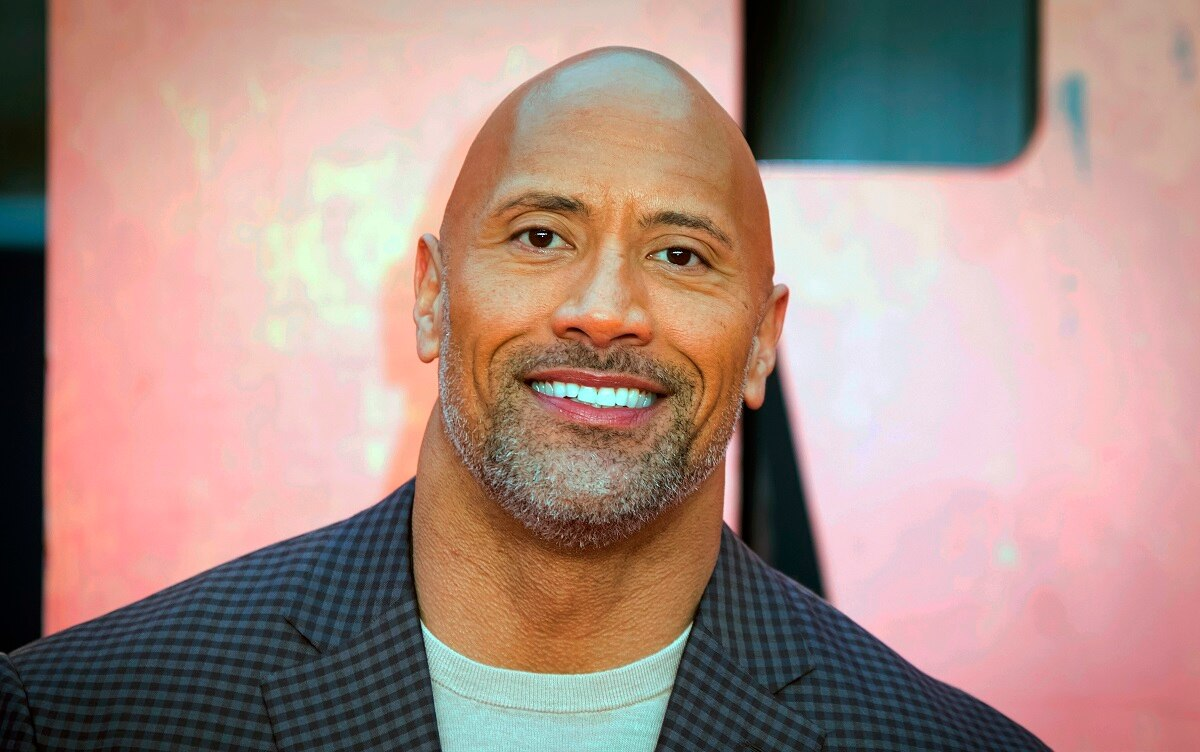





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This is Nicolas Cage:


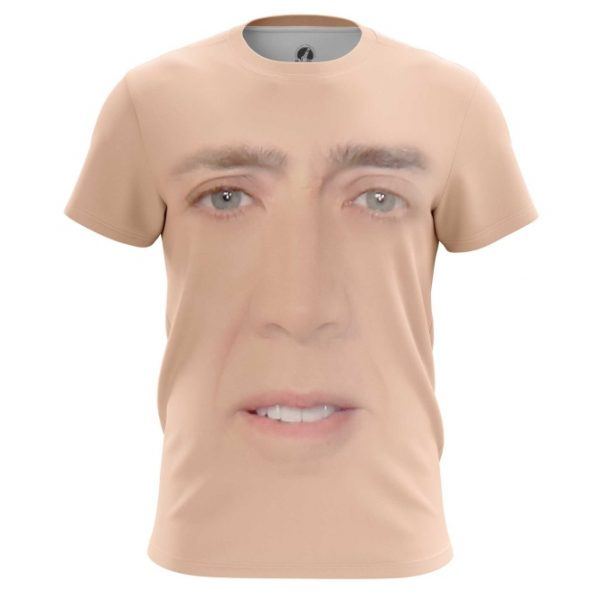





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This is not Nicolas Cage:


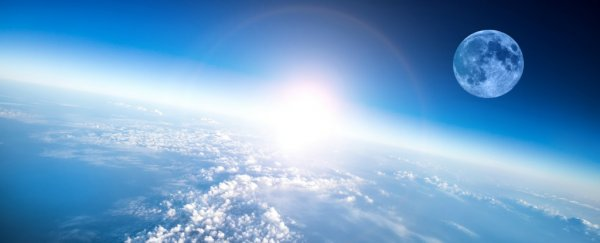

In [192]:
predict_path = 'predict'

for file in os.listdir(predict_path):
    if not file.startswith('.'): # to avoid .ds_store files on my mac
        file = predict_path + "/" + file

        test_image = image.load_img(file, target_size = (200, 200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        
        result = classifier.predict(test_image)

        training_set.class_indices
        if result[0][0] == 1:
            prediction = 'This is Nicolas Cage:'
        else:
            prediction = 'This is not Nicolas Cage:'

        
        print(prediction)
        img = Image(file, width = "400", height = "400")
        display(img)
        print("\n")
        print("\n")